
<h1><center> <font color='black'>  Network Science (LTAT.02.011) - Homework - 04  (Total points - 10)</font></center></h1>
<h2><center> <font color='black'> Introduction to Network Analysis</font></center></h3>
<h2><center> <font color='black'> University of Tartu</font></center></h3>


# Homework Instructions


- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name.

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.


- The accepted submission format is .ipynb file. Please upload the file on moodle.

- The submission will automatically close on **<font color='red'>3rd May 2023
 at 23:59 pm</font>**, so please make sure you have enough time to submit the homework. 

- You do not necessarily need to work on Colab. Especially as the size and the complexity of datasets will increase through the course, you can install jupyter notebooks locally and work from there.

- If you do not understand what a question is asking for, please ask in Moodle. 

- Please Click on "**Restart and Run All**" before uploading the '.ipynb' file.

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).

- **Note: The tasks which involves writing your thoughts should not contain more than 3-4 sentences. It should be clear and concise.**


**<h2><font color='red'>Student info:</font></h2>**


<font color='red'>Full name: </font> Samir Musali



# 1. Knowledge graphs (10 points)
documentation for reference: https://docs.ampligraph.org/en/1.2.0/install.html

## 1.1 Creating Knowledge Graph (2 points)

In this exercise we will create a knowledge graph from text. For this we will be playing with some wikipedia sentences and try to use them as our data source. The data is downloaded from a [Humor detection corpus](https://github.com/CrowdTruth/Short-Text-Corpus-For-Humor-Detection/tree/master/datasets), so please be mindful.

The idea is to parse each of these news articles and extract facts (head, relation, tail) from the sentences. 

Let's get started!

**1.1.1. First import the required packages and load the wiki_sentences.pickle dataset.(No points)**

Hints for import, 
- Pandas: to load data
- Networkx: for KG visualization
- Spacy: For NLP operations
- Spacy.matcher: for relation extraction
- Matplotlib: for plotting

Hints for data, 
- You can use `pandas.read_pickle()` to load the data 

In [1]:
import pandas as pd
import networkx as nx
from tqdm import tqdm
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher 
import matplotlib.pyplot as plt

sentences = pd.read_pickle("wiki_sentences.pickle")

**1.1.2 Run a funtion which extracts entities from a sentence. Make sure to test it on sample sentences (first few from the dataset). (0.25 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [2]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

entity_pairs = []

for i in tqdm(sentences, position=0, leave=True):
  entity_pairs.append(get_entities(i))

100%|██████████| 5251/5251 [00:47<00:00, 110.50it/s]


**1.1.3 Write a function which extracts relation from a sentence. Make sure to test it on sample sentences (first few from the dataset). (0.25 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [3]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", [pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

relations = []
for i in tqdm(sentences, position=0, leave=True):
  relations.append(get_relation(i))

100%|██████████| 5251/5251 [00:46<00:00, 112.36it/s]


**1.1.4 Combine the entities and relation together to form a Pandas dataframe. The dataframe will have 3 columns - source, edge and target. Some sentences may have missing entities, remove such rows.(1 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [4]:
# extract subject
source = [pair[0] for pair in entity_pairs]

# extract object
target = [pair[1] for pair in entity_pairs]

kg_df = pd.DataFrame({'source': source, 'edge': relations, 'target': target})

In [5]:
kg_df_2 = kg_df.replace({"": None}).dropna()
kg_df_2.head(40)

,source,edge,target
0,two,make,love
5,boys,make,friends
6,They,have,two children
10,many Suharto,had,one name
11,Gaye,had,three children
12,They,have,three children
13,Little,known,life
14,Many breeds,carry,pinto patterns
15,Three species,live in fresh,fresh water rivers
16,She,decides,away home


**1.1.5 Create a NetworkX graph using the dataframe created in the last subsection. Next we will plot the networkx graph.(0.5 points)**<br>
<font color='red'>Write your observation in the `Your answer` cell.</font>

Hint, 
- `from_pandas_edgelist()` can be used for transforming dataframe to networkx graph.
- `nx.spring_layout(G)` can be used for visualization. <br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [6]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df_2, "source", "target", 
                          edge_attr=True, create_using=nx.DiGraph())

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 155 (\x9b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.pri

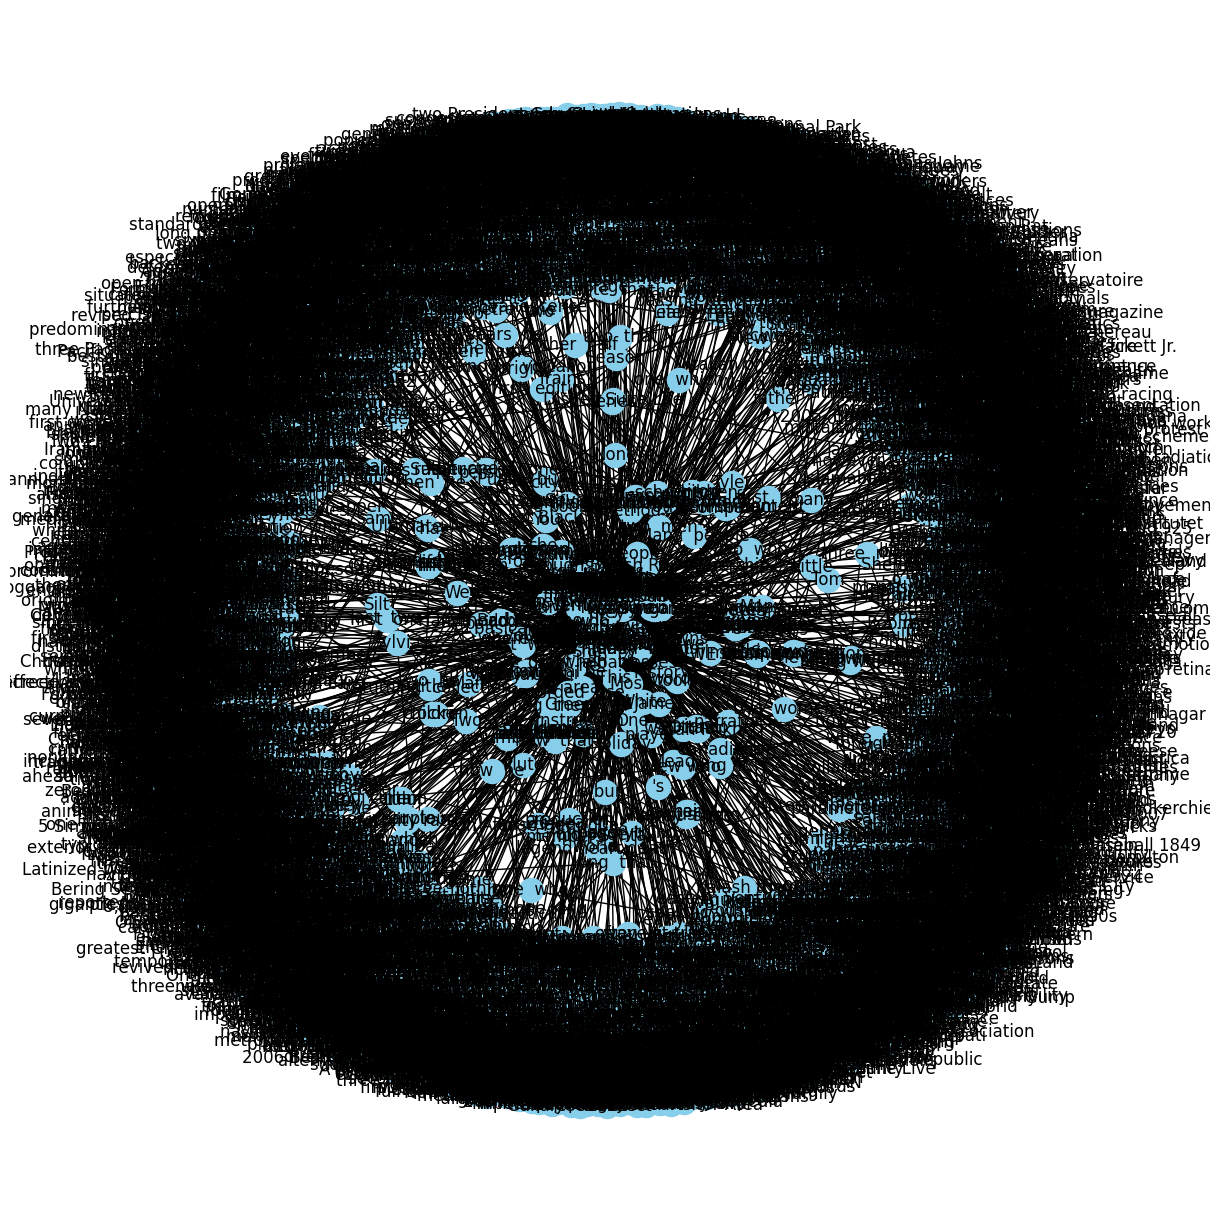

In [7]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

**<font color='red'>Your answer:</font>** Based on the code we wrote, we extracted entities and relations from a set of sentences and formed a knowledge graph using `NetworkX`. The resulting graph visually represents the connections between the different entities and relations extracted from the input sentences. Overall, this exercise demonstrates how natural language processing techniques can extract structured information from unstructured data and can be used to create knowledge graphs that help understand the relationships between different entities.

## 1.2 Knowledge graph for clustering and classification (8 points)

In this exercise you are going to use the dataset from [kaggle](https://www.kaggle.com/jaykay12/odi-cricket-matches-19712017#ContinousDataset.csv) that contains all the One-Day International (ODI) Cricket Matches in the interval 1971-2017. Cricket is a popular game developed by Britishers and is very popular in South Asian countries, Australia, U.K, South Africa, and Carribean Islands. If you would like more information, [Lagaan](https://www.youtube.com/watch?v=oSIGQ0YkFxs) is an intersting Oscar candidate movie that explains the relation between colonial taxes and cricket, set in India.

In this dataset the field "Ground" refers to the location where the match was held. 

**1.2.1 Load the dataset cricket_data.csv. Create the entities match_id, ground_id,country_id,home_team_id,away_team_id and neutral that are going to be part of our knowledge graph. (0.5 point)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [8]:
df = pd.read_csv('cricket_data.csv')

df["match_id"] = df.index.values.astype(str)
df["match_id"] =  "Match_" + df['match_id']
df["ground_id"] = "Ground_" + df["ground"].astype(str)
df["country_id"] = "Country_" + df["host_country"].astype(str)
df["home_team_id"] = "Team_" + df["home_team"].astype(str)
df["away_team_id"] = "Team_" + df["away_team"].astype(str)
df["neutral"] = df['neutral'].astype(str)

df

,ground,date,winner,host_country,home_team,away_team,neutral,match_id,ground_id,country_id,home_team_id,away_team_id
0,Melbourne,"Jan 5, 1971",Australia,Australia,Australia,England,False,Match_0,Ground_Melbourne,Country_Australia,Team_Australia,Team_England
1,Manchester,"Aug 24, 1972",England,England,England,Australia,False,Match_1,Ground_Manchester,Country_England,Team_England,Team_Australia
2,Lord's,"Aug 26, 1972",Australia,England,England,Australia,False,Match_2,Ground_Lord's,Country_England,Team_England,Team_Australia
3,Birmingham,"Aug 28, 1972",England,England,England,Australia,False,Match_3,Ground_Birmingham,Country_England,Team_England,Team_Australia
4,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,New Zealand,Pakistan,False,Match_4,Ground_Christchurch,Country_New Zealand,Team_New Zealand,Team_Pakistan
...,...,...,...,...,...,...,...,...,...,...,...,...
7359,Pune,"Oct 25, 2017",India,India,India,New Zealand,False,Match_7359,Ground_Pune,Country_India,Team_India,Team_New Zealand
7360,Kanpur,"Oct 29, 2017",India,India,India,New Zealand,False,Match_7360,Ground_Kanpur,Country_India,Team_India,Team_New Zealand
7361,Mumbai,"Aug 12, 2017",Namibia,India,Namibia,Hong Kong,True,Match_7361,Ground_Mumbai,Country_India,Team_Namibia,Team_Hong Kong
7362,Mumbai,"Aug 12, 2017",U.S.A.,India,U.S.A.,Bermuda,True,Match_7362,Ground_Mumbai,Country_India,Team_U.S.A.,Team_Bermuda


**1.2.2 Select manually 80%  as train set of the data and create the triples ['subject', 'predicate', 'object'] using the entities from 1.2.1. (1 point)** Hint: If there are some errors generated while building the triples check if match_id was formed correctly in 1.2.1<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [9]:
df['train'] = df.index <= int(df.shape[0] * 0.8)

print(df['train'].value_counts(normalize=True))

triples = []
for _, row in df[df["train"]].iterrows():
    # Home and away information
    home_team = (row["home_team_id"], "isHomeTeamIn", row["match_id"])
    away_team = (row["away_team_id"], "isAwayTeamIn", row["match_id"])
    
    # Match results
    if row["winner"] == row["home_team"]:
        score_home = (row["home_team_id"], "winnerOf", row["match_id"])
        score_away = (row["away_team_id"], "loserOf", row["match_id"])
    else:
        score_away = (row["away_team_id"], "winnerOf", row["match_id"])
        score_home = (row["home_team_id"], "loserOf", row["match_id"])

    # Match characteristics
    ground = (row["match_id"], "inGround", row["ground_id"])
    country = (row["match_id"], "inCountry", row["country_id"])
    neutral = (row["match_id"], "isNeutral", row["neutral"])
    year = (row["match_id"], "atYear", row["date"][-4:])
    
    triples.extend((home_team, away_team, score_home, score_away, ground, country, neutral, year))

triples_df = pd.DataFrame(triples, columns=['subject', 'predicate', 'object'])

triples_df

True     0.800109
False    0.199891
Name: train, dtype: float64


,subject,predicate,object
0,Team_Australia,isHomeTeamIn,Match_0
1,Team_England,isAwayTeamIn,Match_0
2,Team_Australia,winnerOf,Match_0
3,Team_England,loserOf,Match_0
4,Match_0,inGround,Ground_Melbourne
...,...,...,...
47131,Team_West Indies,winnerOf,Match_5891
47132,Match_5891,inGround,Ground_Auckland
47133,Match_5891,inCountry,Country_New Zealand
47134,Match_5891,isNeutral,False


**1.2.3 Select only one match_id and visualize its knowledge graph using networkx (0.50 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

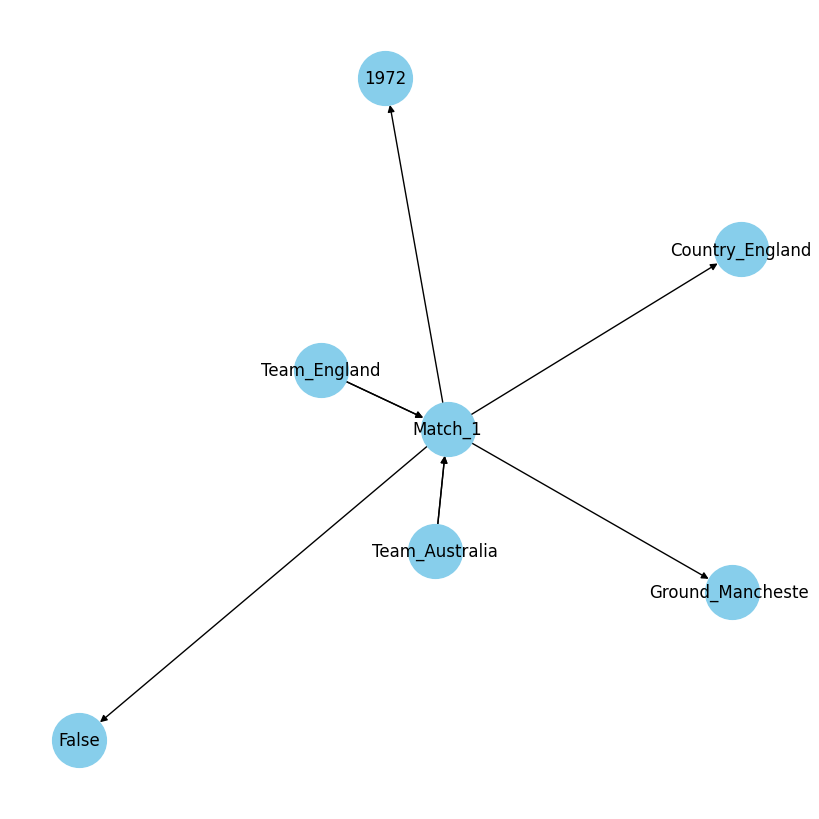

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

match_df = triples_df[(triples_df.subject=="Match_1") | (triples_df.object=="Match_1")]

G=nx.from_pandas_edgelist(match_df, "subject", "object", 
                          edge_attr="predicate", create_using=nx.MultiDiGraph())

plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k = 1)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

**1.2.4 Split the triples into train and validation set. Set the test size equal to 20% of the records in the dataset. Train the ComplEx model for knowledge graphs embeddings and evaluate its performance using mr_score, mrr_score, hits_at_n_score. (1 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

**1.2.5 Use the same train and validation set obtained from 1.2.4 and train the TransE model for knowledge graphs embeddings and evaluate its performance using mr_score, mrr_score, hits_at_n_score. Use the same parameters for TransE as used for ComplEx (1 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

**1.2.6 Use the same train and validation set obtained from 1.2.4 and train the HolE model for knowledge graphs embeddings and evaluate its performance using mr_score, mrr_score, hits_at_n_score. Use the same parameters for HolE as used for ComplEx (1 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [11]:
%%capture
%%capture
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install ampligraph

In [12]:
import numpy as np

In [13]:
from ampligraph.evaluation import train_test_split_no_unseen 
triples_df.shape

X_train, X_valid = train_test_split_no_unseen(np.array(triples), test_size=0.2)
print('Train set size: ', X_train.shape)
print('Test set size: ', X_valid.shape)

Train set size:  (37709, 3)
Test set size:  (9427, 3)


In [14]:
#Please install if not there
!pip install tensorflow

import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.12.0


In [15]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel
from ampligraph.latent_features.loss_functions import get as get_loss
from ampligraph.latent_features.regularizers import get as get_regularizer
import tensorflow as tf

model = ScoringBasedEmbeddingModel(scoring_type='ComplEx',
                k=100,
                eta=20,
             )
# Optimizer, loss and regularizer definition
optim = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = get_loss('pairwise', {'margin': 0.5})
regularizer = get_regularizer('LP', {'p': 3, 'lambda': 1e-5})

# Compilation of the model
model.compile(optimizer=optim, loss=loss, entity_regularizer=regularizer)

# keep batch size = 50, epochs = 100, verbose = True in fit(), if it is taking much time, then reduce the epochs number:
model.fit(X_train, epochs=100, batch_size=50, verbose=True)

Epoch 1/100
756/756 [==============================] - 28s 37ms/step - loss: 499.4656
Epoch 2/100
756/756 [==============================] - 6s 8ms/step - loss: 499.1547
Epoch 3/100
756/756 [==============================] - 4s 5ms/step - loss: 498.3812
Epoch 4/100
756/756 [==============================] - 4s 6ms/step - loss: 496.0288
Epoch 5/100
756/756 [==============================] - 5s 6ms/step - loss: 489.7916
Epoch 6/100
756/756 [==============================] - 4s 5ms/step - loss: 476.5827
Epoch 7/100
756/756 [==============================] - 6s 8ms/step - loss: 453.7527
Epoch 8/100
756/756 [==============================] - 7s 10ms/step - loss: 423.9983
Epoch 9/100
756/756 [==============================] - 7s 9ms/step - loss: 394.1040
Epoch 10/100
756/756 [==============================] - 8s 10ms/step - loss: 366.6806
Epoch 11/100
756/756 [==============================] - 8s 11ms/step - loss: 341.9207
Epoch 12/100
756/756 [==============================] - 6s 8ms/step -

In [16]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel
model1 = ScoringBasedEmbeddingModel(k=100, eta=20, scoring_type='TransE')

# Optimizer, loss and regularizer definition
optim = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = get_loss('pairwise', {'margin': 0.5})
regularizer = get_regularizer('LP', {'p': 3, 'lambda': 1e-5})

model1.compile(optimizer='adam', loss='multiclass_nll')

# keep batch size = 50, epochs = 100, verbose = True in fit(), if it is taking much time, then reduce the epochs number:
model.fit(X_train, epochs=100, batch_size=50, verbose=True)

Epoch 1/100
756/756 [==============================] - 4s 5ms/step - loss: 52.5882
Epoch 2/100
756/756 [==============================] - 3s 4ms/step - loss: 52.2212
Epoch 3/100
756/756 [==============================] - 3s 4ms/step - loss: 51.8620
Epoch 4/100
756/756 [==============================] - 5s 6ms/step - loss: 51.5088
Epoch 5/100
756/756 [==============================] - 3s 4ms/step - loss: 51.1609
Epoch 6/100
756/756 [==============================] - 3s 4ms/step - loss: 50.8195
Epoch 7/100
756/756 [==============================] - 4s 5ms/step - loss: 50.4852
Epoch 8/100
756/756 [==============================] - 3s 4ms/step - loss: 50.1575
Epoch 9/100
756/756 [==============================] - 3s 4ms/step - loss: 49.8358
Epoch 10/100
756/756 [==============================] - 3s 4ms/step - loss: 49.5206
Epoch 11/100
756/756 [==============================] - 3s 4ms/step - loss: 49.2118
Epoch 12/100
756/756 [==============================] - 3s 4ms/step - loss: 48.9078
E

In [17]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel

model2 = ScoringBasedEmbeddingModel(k=100, eta=20, scoring_type='HolE')

# Optimizer, loss and regularizer definition
optim = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = get_loss('pairwise', {'margin': 0.5})
regularizer = get_regularizer('LP', {'p': 3, 'lambda': 1e-5})

model2.compile(optimizer='adam', loss='multiclass_nll')

# keep batch size = 50, epochs = 100, verbose = True in fit(), if it is taking much time, then reduce the epochs number:
model.fit(X_train, epochs=100, batch_size=50, verbose=True)

Epoch 1/100
756/756 [==============================] - 4s 6ms/step - loss: 34.0177
Epoch 2/100
756/756 [==============================] - 4s 5ms/step - loss: 33.9258
Epoch 3/100
756/756 [==============================] - 3s 4ms/step - loss: 33.8351
Epoch 4/100
756/756 [==============================] - 3s 4ms/step - loss: 33.7449
Epoch 5/100
756/756 [==============================] - 5s 6ms/step - loss: 33.6549
Epoch 6/100
756/756 [==============================] - 3s 4ms/step - loss: 33.5657
Epoch 7/100
756/756 [==============================] - 3s 4ms/step - loss: 33.4776
Epoch 8/100
756/756 [==============================] - 5s 6ms/step - loss: 33.3906
Epoch 9/100
756/756 [==============================] - 3s 4ms/step - loss: 33.3042
Epoch 10/100
756/756 [==============================] - 3s 4ms/step - loss: 33.2191
Epoch 11/100
756/756 [==============================] - 3s 4ms/step - loss: 33.1352
Epoch 12/100
756/756 [==============================] - 3s 4ms/step - loss: 33.0518
E

In [18]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

filter = {'test' : np.concatenate((X_train, X_valid))}

ranks = model.evaluate(X_valid, use_filter=filter, corrupt_side='s,o')

296/296 [==============================] - 55s 186ms/step


In [21]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

filter_triples = np.concatenate((X_train, X_valid))

ranks1 = model1.evaluate(X_valid, use_filter=filter, corrupt_side='s,o')

AttributeError: ignored

In [22]:
ranks2 = model2.evaluate(X_valid, use_filter=filter, corrupt_side='s,o')

AttributeError: ignored

In [23]:
mr = mr_score(ranks)
mrr = mrr_score(ranks)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 0.14
MR: 1598.48
Hits@10: 0.21
Hits@3: 0.15
Hits@1: 0.11


In [24]:
mr = mr_score(ranks1)
mrr = mrr_score(ranks1)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

NameError: ignored

In [25]:
mr = mr_score(ranks2)
mrr = mrr_score(ranks2)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

NameError: ignored

**1.2.8 Create a dictionary with the embeddings (from ComplEx embedding) of all teams and use PCA to project embeddings to 2D space. Cluster the team embeddings in 6 clusters and plot them in a 2D graph. (1 points)<br>
Note: Now onwards in this Homework, we will be using only ComplEx embedding.**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>


In [26]:
%%capture
!pip install seaborn adjustText
!git clone https://github.com/wyldebeast-wunderliebe/incf.countryutils.git
!pip install incf.countryutils/.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from incf.countryutils import transformations
%matplotlib inline

In [27]:
id_to_name_map = {**dict(zip(df.home_team_id, df.home_team)), **dict(zip(df.away_team_id, df.away_team))}

teams = pd.concat((df.home_team_id[df["train"]], df.away_team_id[df["train"]])).unique()
team_embeddings = dict(zip(teams, model.get_embeddings(teams)))

embeddings_2d = PCA(n_components=2).fit_transform(np.array([team_embeddings[team] for team in teams]))

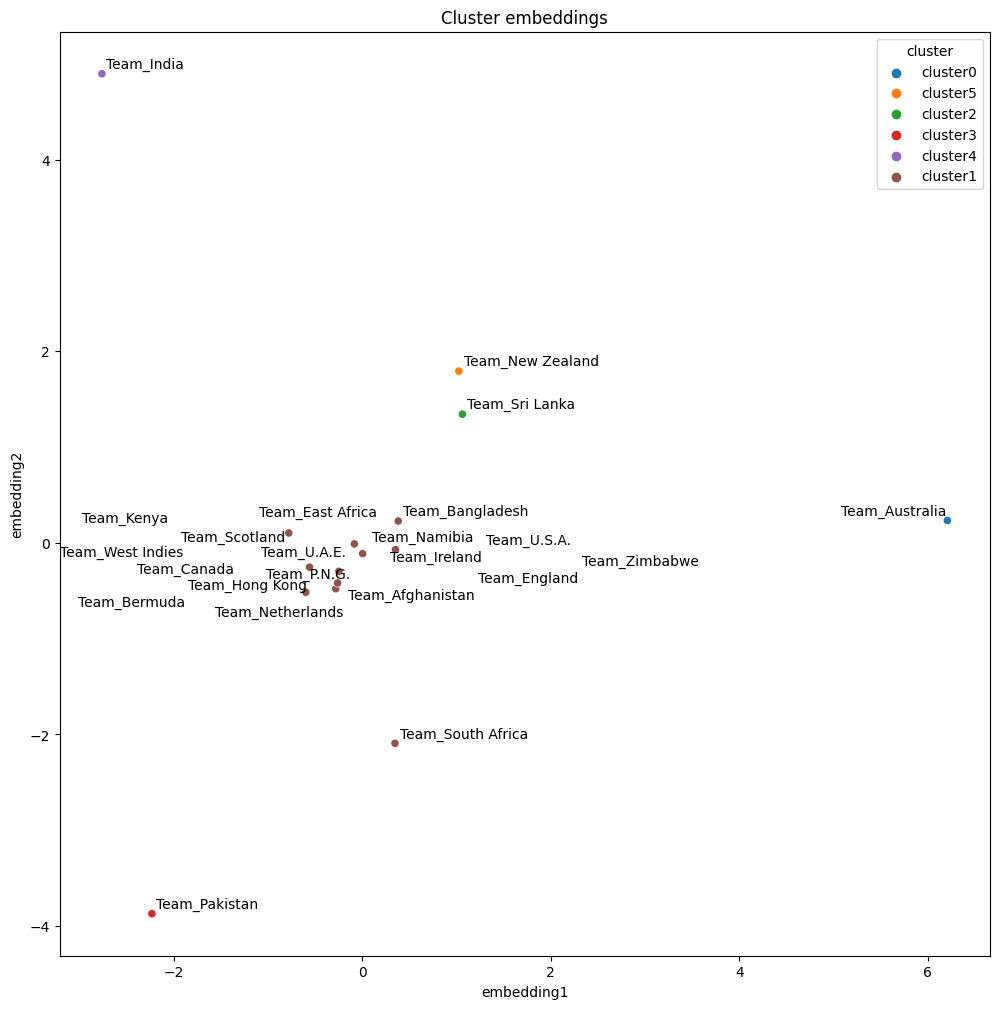

In [28]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

clustering_algorithm = KMeans(n_clusters=6, n_init=50, max_iter=500, random_state=0)
clusters = find_clusters(teams, model, clustering_algorithm, mode='e')

def cn_to_ctn(country):
    try:
        return transformations.cn_to_ctn(id_to_name_map[country])
    except KeyError:
        return "unk"

plot_df = pd.DataFrame({"teams": teams, 
                        "embedding1": embeddings_2d[:, 0], 
                        "embedding2": embeddings_2d[:, 1],
                        "continent": pd.Series(teams).apply(cn_to_ctn),
                        "cluster": "cluster" + pd.Series(clusters).astype(str)})

def plot_clusters(hue):
    plt.figure(figsize=(12, 12))
    plt.title("{} embeddings".format(hue).capitalize())
    ax = sns.scatterplot(data=plot_df[plot_df.continent!="unk"], x="embedding1", y="embedding2", hue=hue)
    texts = []
    for i, point in plot_df.iterrows():
      texts.append(plt.text(point['embedding1']+0.02, point['embedding2']+0.01, str(point["teams"])))
    adjust_text(texts)


plot_clusters("cluster")

**1.2.9 In order to predict if the home team is going to win or lose we need to define a target variable. Create a new column called "result" in the dataframe that takes the value 'home_team_wins' if the home team is the winner and 'home_team_loses' if the home team has not won the match. (0.5 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>


In [29]:
df['result'] = 'home_team_loses'
df.loc[df['winner'] != df['home_team'], 'result'] = 'home_team_loses'

df['result'].value_counts()

home_team_loses    7364
Name: result, dtype: int64

**1.2.10 Create a function that extracts the features (knowledge embeddings for home and away teams) and the target for a particular subset of the dataset (You can use the function from practice session). Run the function to get the variables for X_train, y_train, X_test and y_test. Remember that the train set indices are the same as in 1.2.2 (1 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>



In [43]:
def get_features_target(mask):
    
    def get_embeddings(team):
        return team_embeddings.get(team, np.full(200, np.nan))
    
    home_teams = set(df[mask].home_team_id.unique())
    away_teams = set(df[mask].away_team_id.unique())
    missing_home = home_teams - set(team_embeddings.keys())
    missing_away = away_teams - set(team_embeddings.keys())
    print(f"Missing home team embeddings for {len(missing_home)} teams: {missing_home}")
    print(f"Missing away team embeddings for {len(missing_away)} teams: {missing_away}")
    
    home_embeddings = np.vstack(df[mask].home_team_id.apply(get_embeddings).values)
    away_embeddings = np.vstack(df[mask].away_team_id.apply(get_embeddings).values)
    if home_embeddings.size == 0 or away_embeddings.size == 0:
        return None, None
    X = np.hstack((home_embeddings, away_embeddings))
    y = df[mask]['result'].values
    return X, y
    
clf_X_train, y_train = get_features_target(df.index.isin(X_train[:, 0].astype(str)))
clf_X_test, y_test = get_features_target(df.index.isin(X_valid[:, 0].astype(str)))
if clf_X_train is not None and clf_X_test is not None:
    print(clf_X_train.shape, clf_X_test.shape)
else:
    print("Empty arrays detected")

Missing home team embeddings for 0 teams: set()
Missing away team embeddings for 0 teams: set()


ValueError: ignored

**1.2.11 Create an instance of XGBClassifier and fit the training samples. Evaluate the accuracy of the model in test set. (0.5 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>


In [ ]:

# !pip install xgboost
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.fit_transform(y_test)

clf_model = XGBClassifier(n_estimators=500, max_depth=5, objective="multi:softmax", num_class=2)

#TODO

In [ ]:
# baseline
df[~df["train"]]['result'].value_counts(normalize=True)

In [ ]:
from sklearn import metrics

metrics.accuracy_score(#TODO, clf_model.predict(clf_X_test))

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks. Please change X in the next cell into your estimate.

<font color='red'> **Answer:** </font> 20 hours




## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:** </font> 11 - it was definitely so hard that I decided to submit by being unable to complete it!